### [Problem 1] Learning classification with self-made dataset

In [1]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
#from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import glob 
import re
import cv2
from PIL import Image
%matplotlib inline
import random
from os import listdir

In [2]:
print(listdir("Dataset"))

['cat and dog.jpg', 'cat and dog1.jpg', 'cat and dogs.jpg', 'test', 'train', 'white cat and dog.jpg']


Define Constants

In [3]:
batch_size = 2
epochs = 15
IMG_HEIGHT = 200
IMG_WIDTH = 200
IMAGE_SIZE=(IMG_WIDTH, IMG_HEIGHT)
IMAGE_CHANNELS=3

In [4]:
filenames = listdir("Dataset/train/")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [5]:
filenames

['cat.1.jpg',
 'cat.2.jpg',
 'cat.3.jpg',
 'cat.4.jpg',
 'cat.5.jpg',
 'dog.1.jpg',
 'dog.2.jpg',
 'dog.3.jpg',
 'dog.4.jpg',
 'dog.5.jpg']

In [6]:
df

,filename,category
0,cat.1.jpg,0
1,cat.2.jpg,0
2,cat.3.jpg,0
3,cat.4.jpg,0
4,cat.5.jpg,0
5,dog.1.jpg,1
6,dog.2.jpg,1
7,dog.3.jpg,1
8,dog.4.jpg,1
9,dog.5.jpg,1


(224, 224, 3)


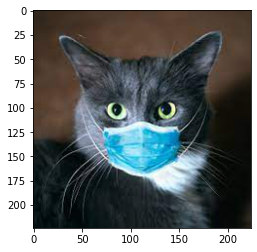

In [7]:
sample = random.choice(filenames)
image = load_img("Dataset/train/"+sample)
image = image.resize((224, 224))
image = np.array(image)
print(image.shape)
plt.imshow(image)

In [8]:
from numpy import asarray
from numpy import save
from keras.preprocessing.image import img_to_array
# define location of dataset
folder = 'Dataset/train/'
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
# determine class
    output = 0.0
    if file.startswith('cat'):
        output = 1.0
# load image
    photo = load_img(folder + file, target_size=(224, 224))
# convert to numpy array
    photo_array = img_to_array(photo)
# store
    photos.append(photo_array)
    labels.append(output)
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

(10, 224, 224, 3) (10,)


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import optimizers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [10]:
model = Sequential()

model.add(Conv2D(16, (2,2),activation = "relu", input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (2,2), activation = "relu"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(200,  activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(200, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))
opt = optimizers.Adam(lr=0.001)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])


C:\Users\SAHR\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [11]:
model.fit(photos, labels, epochs=20)

Epoch 1/20
1/1 [==============================] - 117s 117s/step - loss: 2.5502 - accuracy: 0.7000
Epoch 2/20
1/1 [==============================] - 2s 2s/step - loss: 620.5145 - accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 3s 3s/step - loss: 131.9226 - accuracy: 0.3000
Epoch 4/20
1/1 [==============================] - 3s 3s/step - loss: 283.6351 - accuracy: 0.4000
Epoch 5/20
1/1 [==============================] - 5s 5s/step - loss: 204.6380 - accuracy: 0.4000
Epoch 6/20
1/1 [==============================] - 4s 4s/step - loss: 107.4339 - accuracy: 0.6000
Epoch 7/20
1/1 [==============================] - 3s 3s/step - loss: 47.3020 - accuracy: 0.6000
Epoch 8/20
1/1 [==============================] - 6s 6s/step - loss: 43.3010 - accuracy: 0.6000
Epoch 9/20
1/1 [==============================] - 8s 8s/step - loss: 29.0184 - accuracy: 0.8000
Epoch 10/20
1/1 [==============================] - 7s 7s/step - loss: 46.9921 - accuracy: 0.7000
Epoch 11/20
1/1 [==============

In [12]:
folder2 = 'Dataset/test/'
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder2):
# determine class
    output = 0.0
    if file.startswith('cat'):
        output = 1.0
# load image
    photo = load_img(folder2 + file, target_size=(224, 224))
# convert to numpy array
    photo = img_to_array(photo)
# store
    photos.append(photo)
    labels.append(output)
# convert to a numpy arrays
X_test = asarray(photos)
y_test = asarray(labels)

In [13]:
print(X_test.shape)

(11, 224, 224, 3)


In [14]:
Y_pred = np.round(model.predict(X_test))

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, Y_pred)

array([[0, 5],
       [1, 5]], dtype=int64)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, Y_pred)

0.45454545454545453

### [Problem 2] Data expansion for classification dataset

In [17]:
filenames = listdir("Dataset/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [18]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

In [19]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [20]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split = 0.2
)

In [21]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "Dataset/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 8 validated image filenames belonging to 2 classes.


In [22]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "Dataset/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 2 validated image filenames belonging to 2 classes.


In [23]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "Dataset/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


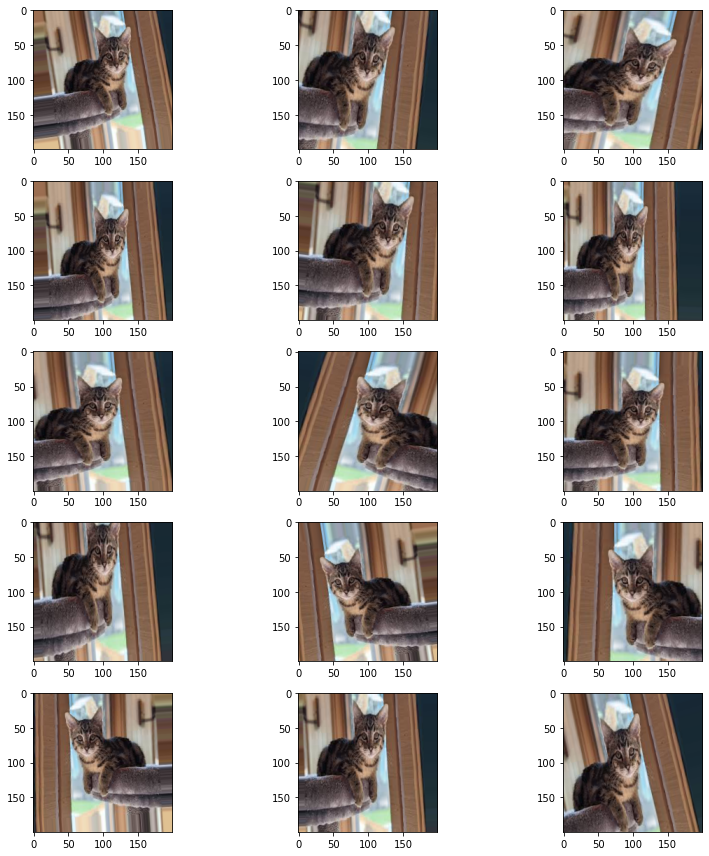

In [24]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [27]:
model.fit_generator(generator=train_generator, epochs=epochs)

C:\Users\SAHR\anaconda3\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
4/4 [==============================] - 132s 10s/step - loss: 4.1279 - accuracy: 0.2167
Epoch 2/15
4/4 [==============================] - 45s 8s/step - loss: 0.7587 - accuracy: 0.6000
Epoch 3/15
4/4 [==============================] - 38s 10s/step - loss: 1.3891 - accuracy: 0.7167
Epoch 4/15
4/4 [==============================] - 40s 9s/step - loss: 0.3960 - accuracy: 0.8667
Epoch 5/15
4/4 [==============================] - 26s 6s/step - loss: 1.4943 - accuracy: 0.6833
Epoch 6/15
4/4 [==============================] - 21s 5s/step - loss: 1.4684 - accuracy: 0.3667
Epoch 7/15
4/4 [==============================] - 23s 6s/step - loss: 0.9805 - accuracy: 0.6333
Epoch 8/15
4/4 [==============================] - 32s 9s/step - loss: 0.3836 - accuracy: 0.6833
Epoch 9/15
4/4 [==============================] - 46s 12s/step - loss: 2.3747 - accuracy: 0.4167
Epoch 10/15
4/4 [==============================] - 36s 8s/step - loss: 0.6945 - accuracy: 0.6333
Epoch 11/15
4/4 [==================

In [28]:
history = history = model.fit_generator(generator=train_generator, 
    epochs=20,
    validation_data=validation_generator,
)

Epoch 1/20
4/4 [==============================] - 46s 13s/step - loss: 0.5227 - accuracy: 0.8750 - val_loss: 15.9900 - val_accuracy: 0.5000
Epoch 2/20
4/4 [==============================] - 34s 9s/step - loss: 0.0202 - accuracy: 1.0000 - val_loss: 15.2659 - val_accuracy: 0.5000
Epoch 3/20
4/4 [==============================] - 22s 6s/step - loss: 1.0860 - accuracy: 0.6250 - val_loss: 16.2860 - val_accuracy: 0.5000
Epoch 4/20
4/4 [==============================] - 31s 8s/step - loss: 0.3082 - accuracy: 0.7500 - val_loss: 18.3473 - val_accuracy: 0.5000
Epoch 5/20
4/4 [==============================] - 25s 7s/step - loss: 0.7366 - accuracy: 0.6250 - val_loss: 19.1115 - val_accuracy: 0.5000
Epoch 6/20
4/4 [==============================] - 29s 7s/step - loss: 0.4457 - accuracy: 0.7500 - val_loss: 17.8051 - val_accuracy: 0.5000
Epoch 7/20
4/4 [==============================] - 29s 8s/step - loss: 0.8218 - accuracy: 0.7500 - val_loss: 17.2035 - val_accuracy: 0.5000
Epoch 8/20
4/4 [==========

### [Problem 3] Preparation of object detection dataset

In [29]:
from PIL import Image
import numpy as np
import numpy  as np
import os
import glob 
import re
import matplotlib.pyplot as plt
import cv2
from PIL import Image
%matplotlib inline

BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)

def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img

def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(7, 7))
    plt.imshow(img)

In [30]:
def download_image(url):
    data = open(url,"rb").read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

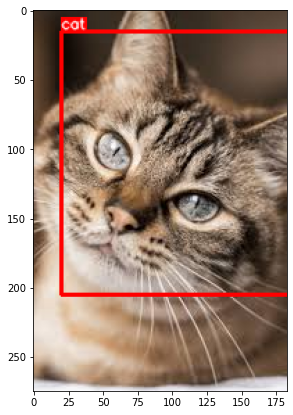

In [31]:
from PIL import Image
image = download_image('Dataset/test/cat.0.jpg')
image = np.array(image)

annotations = {'image': image, 'bboxes': [[20,15,200,190]], 'category_id': [0]}
category_id_to_name = {0: 'cat', 1: 'dog'}
img = visualize(annotations, category_id_to_name)

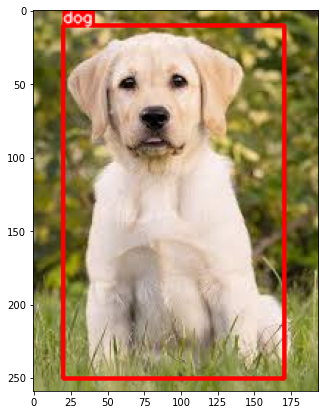

In [32]:
from PIL import Image
image = download_image('Dataset/test/dog.0.jpg')
image = np.array(image)

annotations = {'image': image, 'bboxes': [[20,10,150,240]], 'category_id': [1]}
category_id_to_name = {0: 'cat', 1: 'dog'}
img = visualize(annotations, category_id_to_name)

### [Problem 4] Data expansion for object detection dataset


In [33]:
from urllib.request import urlopen
import cv2
import albumentations as A
from albumentations import (VerticalFlip, HorizontalFlip, Flip, RandomRotate90, Rotate, ShiftScaleRotate, CenterCrop, OpticalDistortion, GridDistortion, ElasticTransform, JpegCompression, HueSaturationValue,
                            RGBShift, RandomBrightness, RandomContrast, Blur, MotionBlur, MedianBlur, GaussNoise, CLAHE, ChannelShuffle, InvertImg, RandomGamma, ToGray, PadIfNeeded 
)

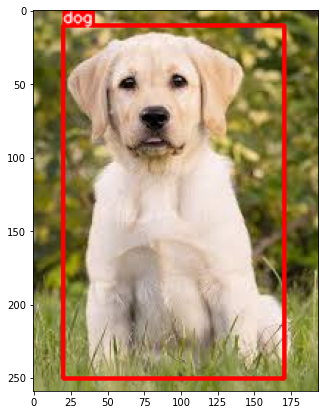

In [34]:
aug = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

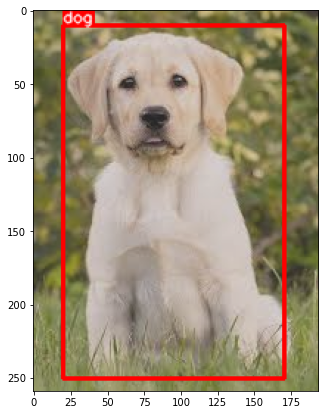

In [35]:
aug = A.Compose([
    A.RandomBrightnessContrast(brightness_limit=1, contrast_limit=1, p=1.0),
    ])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

### Predict

In [36]:
test_filenames = os.listdir("Dataset/test")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [37]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "Dataset/test/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 11 validated image filenames.


In [38]:
predict = model.predict_generator(generator=test_generator, steps=np.ceil(nb_samples/batch_size))

test_df['category'] = np.argmax(predict, axis=-1)

label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

C:\Users\SAHR\anaconda3\lib\site-packages\keras\engine\training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [39]:
# From our prepare data part. We map data with {1: 'dog', 0: 'cat'}. Now we will map the result back to dog is 1 and cat is 0
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

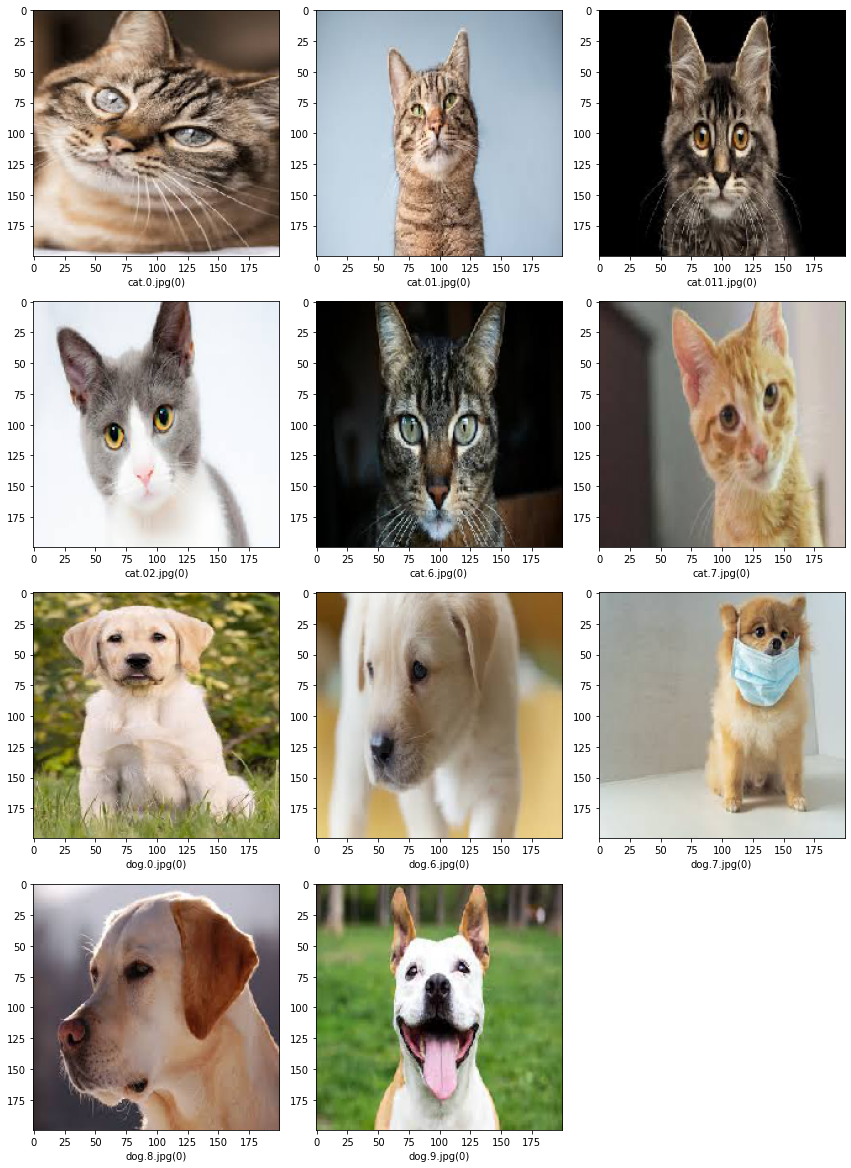

In [40]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("Dataset/test/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [ ]:
I was trying to 